# Exploratory Data Analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import xgboost as xgb

# Exploración Inicial



In [3]:
#00. Carga del Dataframe

#Cargar el dataset desde la URL
# Usamos un dataset de alojamientos de Airbnb en NYC del año 2019
url = "https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv"
df = pd.read_csv(url) 

# Guardamos una copia local del DataFrame por si queremos inspeccionarlo fuera del entorno
df.to_csv("/workspaces/JAS_EDA/AB_NYC_2019_temp.csv", index=False)

In [4]:
#01. Confirmamos la carga mostrando las primeras filas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [5]:
#02. Dimensiones del DataFrame
# Esto nos dice cuántas filas (observaciones) y columnas (variables) tenemos en total
df.shape

(48895, 16)

In [6]:
#03. Información general del DataFrame
# Este método es fundamental para revisar:
    # - El tipo de cada variable (int, float, object, etc.)
    # - Cuántos valores no nulos hay por columna (útil para detectar valores faltantes)
    # - La memoria que ocupa el DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [7]:
# 04. Estadísticas descriptivas
# Este método calcula métricas clave como:
    # - count (número de datos no nulos)
    # - mean (media)
    # - std (desviación estándar)
    # - min, 25%, 50%, 75%, max (distribución de los datos)
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [8]:
#05. Número de valores únicos por columna
df.nunique().sort_values(ascending=False)

id                                48895
name                              47905
host_id                           37457
latitude                          19048
longitude                         14718
host_name                         11452
last_review                        1764
reviews_per_month                   937
price                               674
number_of_reviews                   394
availability_365                    366
neighbourhood                       221
minimum_nights                      109
calculated_host_listings_count       47
neighbourhood_group                   5
room_type                             3
dtype: int64

In [9]:
#06. Eliminar columnas con valores constantes

# Identificar columnas con un solo valor único
cols_constantes = df.nunique()[df.nunique() == 1].index

# Eliminar estas columnas del DataFrame
df = df.drop(columns=cols_constantes)

print(f"Columnas eliminadas: {list(cols_constantes)}")

#07.Eliminar columnas irrelevantes (aunque no sean constantes)
# Eliminamos columnas que no aportan valor al análisis por ser identificadores o texto no útil

df.drop(['id', 'name', 'host_id', 'host_name'], axis=1, inplace=True)

print("Columnas tras eliminación de irrelevantes:", df.columns.tolist())

Columnas eliminadas: []
Columnas tras eliminación de irrelevantes: ['neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']


# Transformaciones de variables objetivo

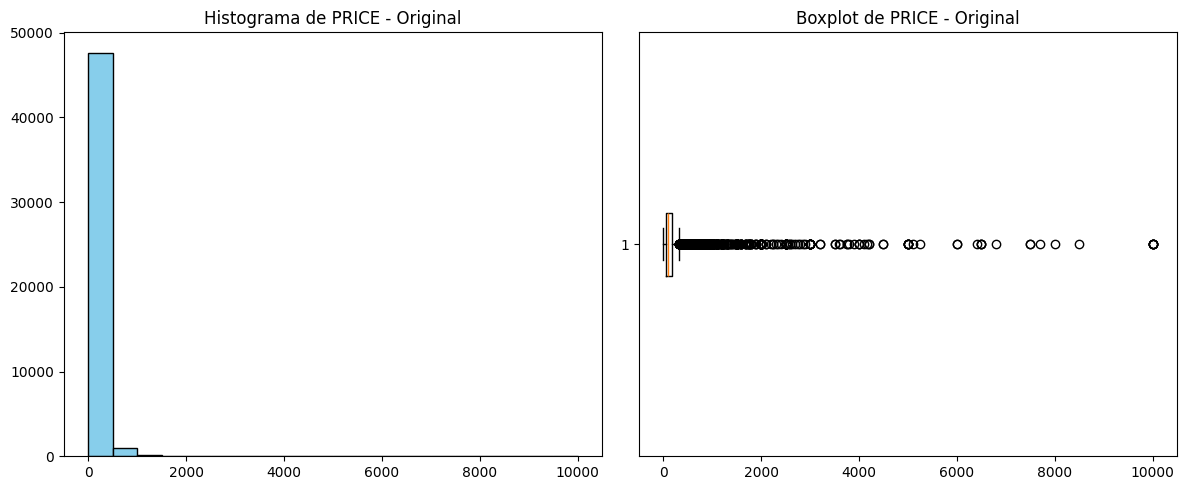

In [10]:
#08. Visualización inicial de price

# Creamos un histograma y un boxplot para observar la distribución de precios
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Histograma
ax[0].hist(df['price'], bins=20, color='skyblue', edgecolor='black')
ax[0].set_title('Histograma de PRICE - Original')

# Boxplot
ax[1].boxplot(df['price'], vert=False)
ax[1].set_title('Boxplot de PRICE - Original')

plt.tight_layout()
plt.show()

In [11]:
#09. Eliminar prices cero y aplicar log_price

# Eliminamos los registros cuyo precio sea igual a cero, ya que no tienen sentido en un análisis de mercado
df = df[df['price'] > 0]

# Creamos una nueva columna 'log_price' aplicando logaritmo natural para reducir la asimetría en la distribución
df['log_price'] = np.log(df['price'])

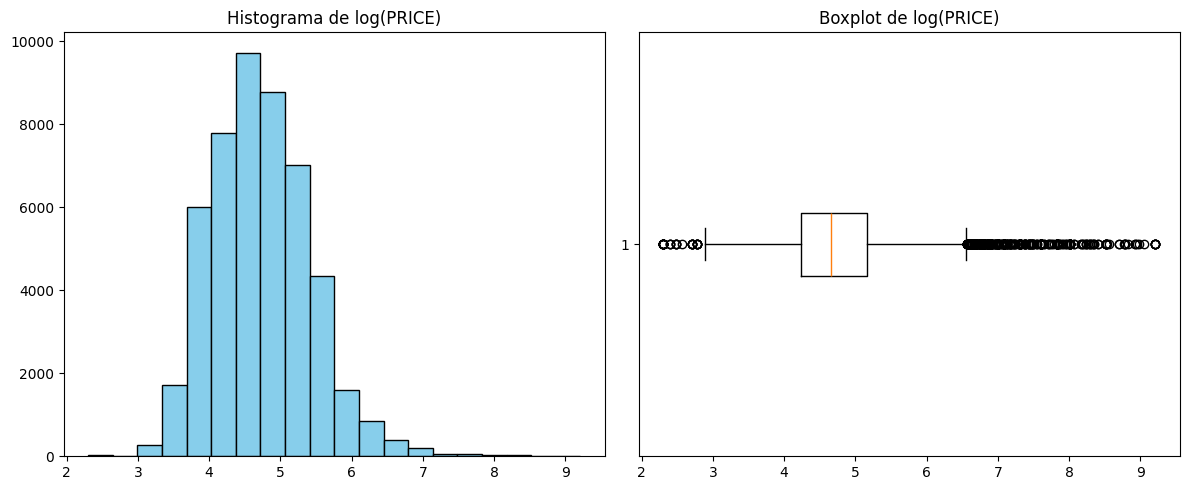

In [12]:
#10. Visualización tras log_price

# Representamos la nueva variable 'log_price' con histograma y boxplot
# Esto permite observar si la transformación logarítmica logró reducir la asimetría del precio

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].hist(df['log_price'], bins=20, color='skyblue', edgecolor='black')
ax[0].set_title('Histograma de log(PRICE)')
ax[1].boxplot(df['log_price'], vert=False)
ax[1].set_title('Boxplot de log(PRICE)')
plt.tight_layout()
plt.show()

# Tratamiento de Nulos

In [13]:
#11. Porcentaje de valores nulos

# Calculamos el porcentaje de valores nulos por columna, tras la transformación del precio para ver si aún hay columnas con datos faltantes

missing_percent = df.isnull().mean() * 100
missing_percent[missing_percent > 0]

#12. Porcentaje de filas con al menos un nulo

# Calculamos el porcentaje de filas que contienen al menos un valor nulo
# Esto nos ayuda a entender la magnitud del problema de datos faltantes a nivel de registros

row_missing = df.isnull().mean(axis=1)
(row_missing > 0).mean() * 100
print("Porcentaje de filas con al menos un nulo:")
print((row_missing > 0).mean() * 100)


Porcentaje de filas con al menos un nulo:
20.56091972833647


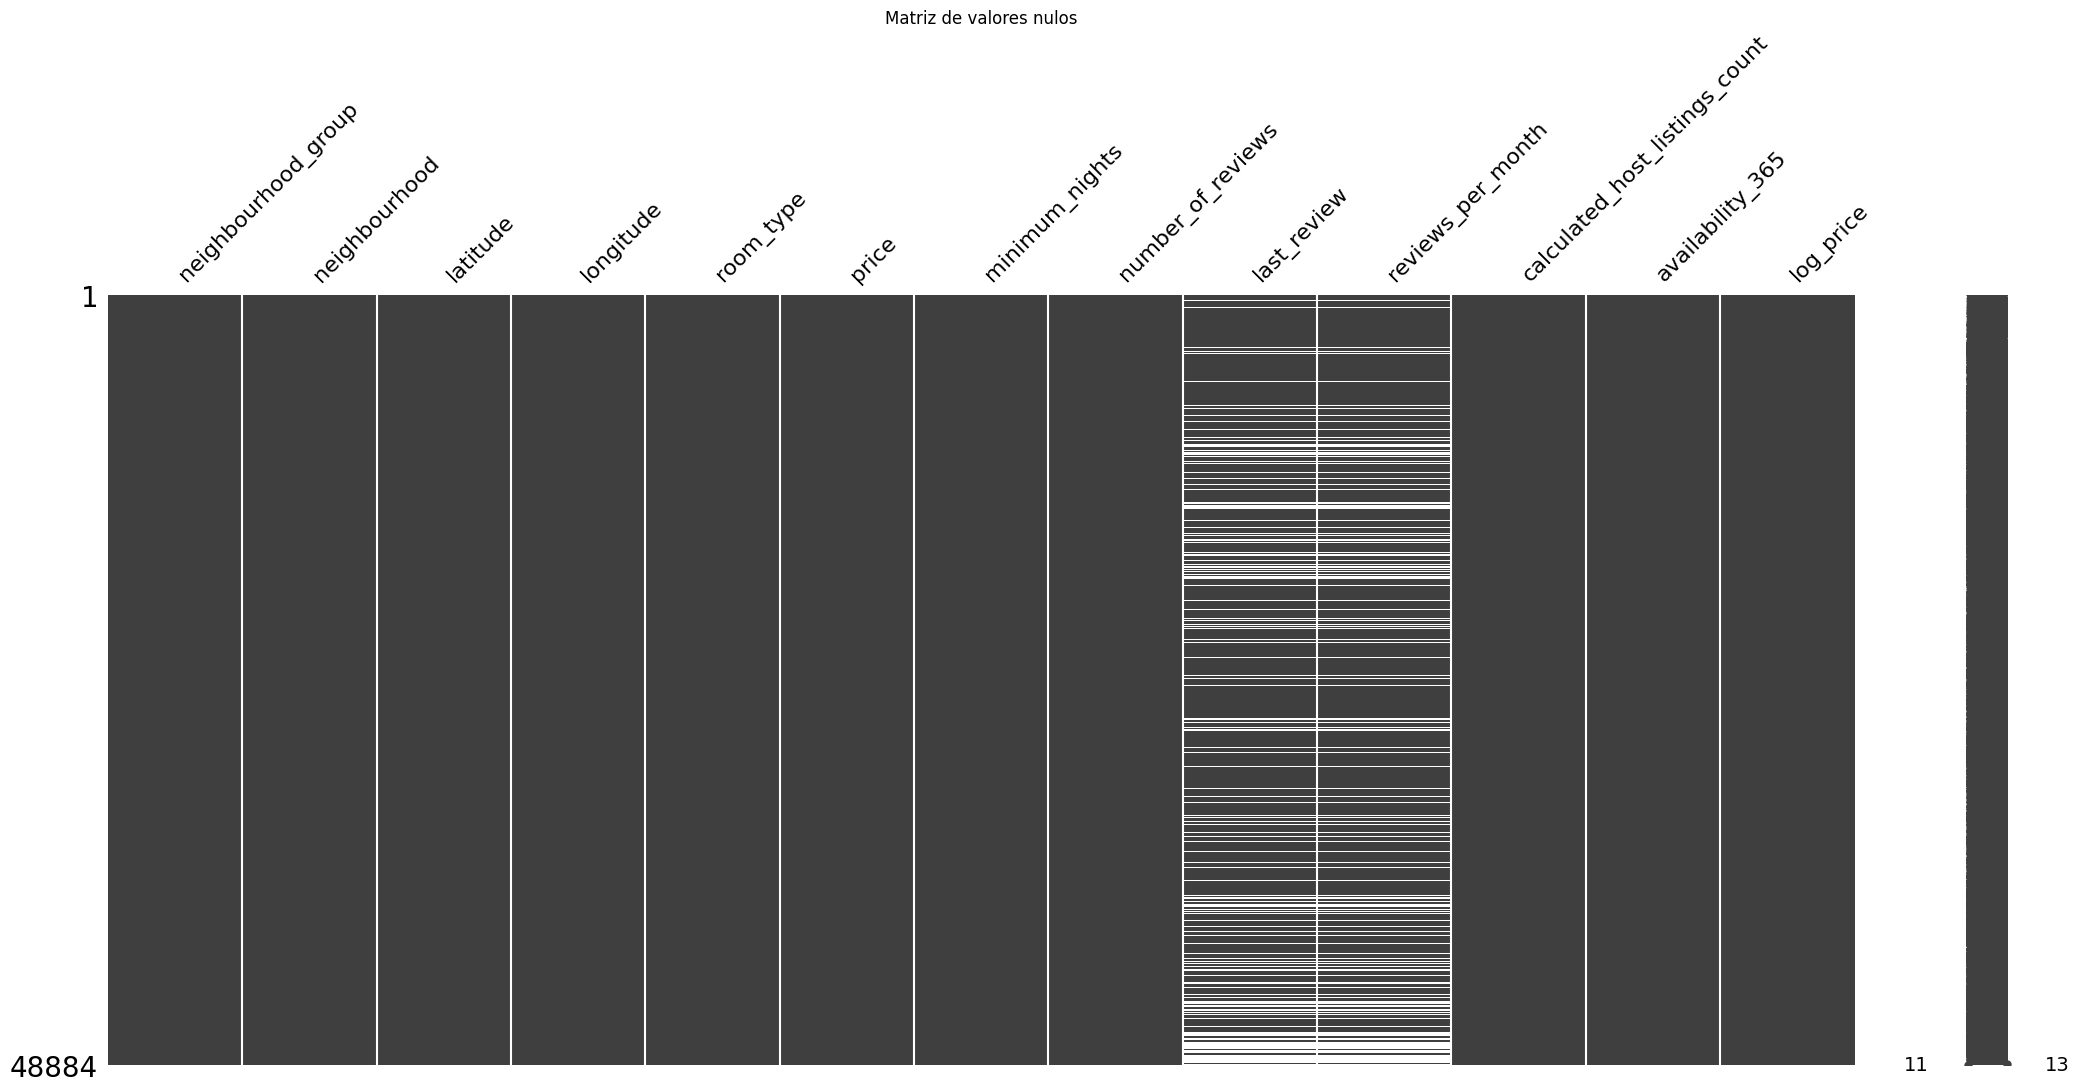

: 

In [ ]:
#13. Matriz de valores nulos
msno.matrix(df)
plt.title("Matriz de valores nulos")
plt.show()

In [ ]:
#14. Imputación con KNNImputer

# Hacemos una copia del DataFrame
df_encoded = df.copy()

# Eliminamos las columnas problemáticas (no numéricas)
df_encoded = df_encoded.drop(['neighbourhood', 'last_review'], axis=1)

# Codificamos variables categóricas
df_encoded['room_type'] = df_encoded['room_type'].astype('category').cat.codes
df_encoded['neighbourhood_group'] = df_encoded['neighbourhood_group'].astype('category').cat.codes

# Aplicamos KNNImputer
from sklearn.impute import KNNImputer
imputador_knn = KNNImputer(n_neighbors=3)
matriz_imp = imputador_knn.fit_transform(df_encoded)

# Reconstruimos el DataFrame
df = pd.DataFrame(matriz_imp, columns=df_encoded.columns, index=df_encoded.index)

# Comprobamos si hay nulos
print("Valores nulos tras imputación:")
print(df.isnull().sum())


# Detección y tratamiento de outliers

In [ ]:
#15. Guardamos una única copia del DataFrame antes de filtros de outliers
df_original_outliers = df.copy()

NameError: name 'df' is not defined

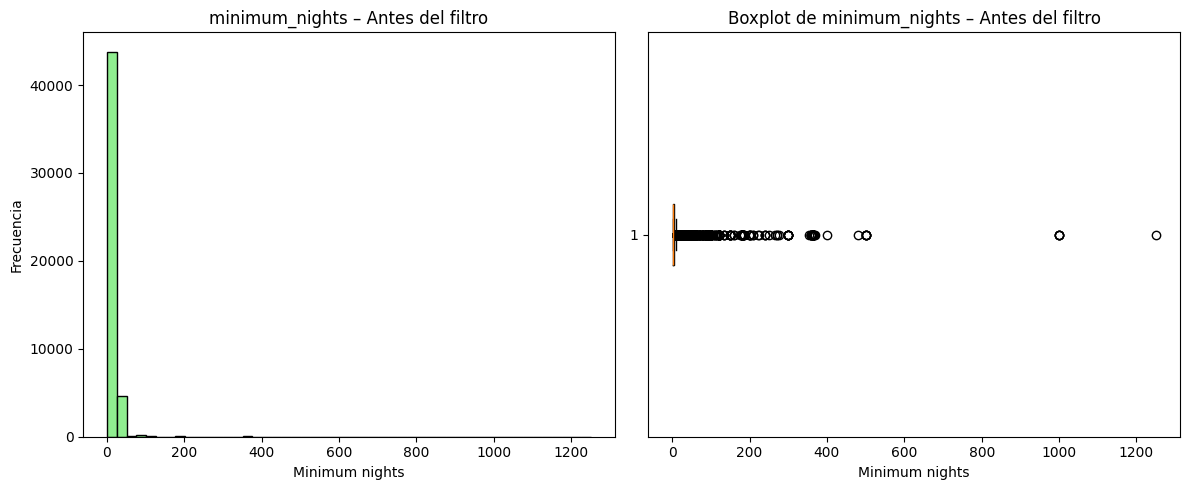

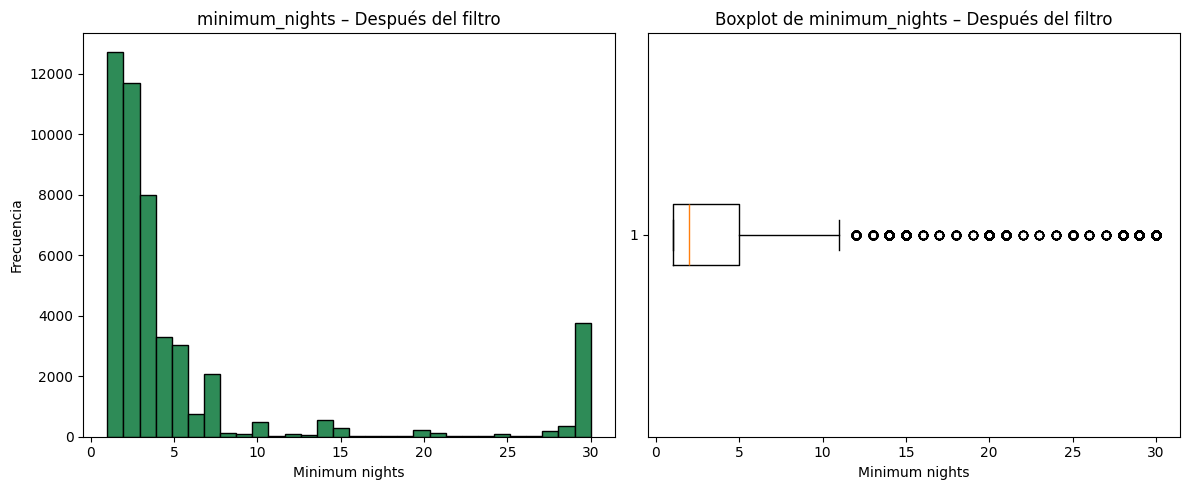

Casos originales: 48884
Casos después del filtro: 48137
Casos eliminados: 747


In [ ]:
#16. Visualización Minimum_nights
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].hist(df_original_outliers['minimum_nights'], bins=50, color='lightgreen', edgecolor='black')
ax[0].set_title('minimum_nights – Antes del filtro')
ax[0].set_xlabel('Minimum nights')
ax[0].set_ylabel('Frecuencia')

ax[1].boxplot(df_original_outliers['minimum_nights'], vert=False)
ax[1].set_title('Boxplot de minimum_nights – Antes del filtro')
ax[1].set_xlabel('Minimum nights')

plt.tight_layout()
plt.show()

# Aplicar filtro
df = df_original_outliers[df_original_outliers['minimum_nights'] <= 30]

# Visualización después del filtro
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].hist(df['minimum_nights'], bins=30, color='seagreen', edgecolor='black')
ax[0].set_title('minimum_nights – Después del filtro')
ax[0].set_xlabel('Minimum nights')
ax[0].set_ylabel('Frecuencia')

ax[1].boxplot(df['minimum_nights'], vert=False)
ax[1].set_title('Boxplot de minimum_nights – Después del filtro')
ax[1].set_xlabel('Minimum nights')

plt.tight_layout()
plt.show()

# Comparación numérica
print("Casos originales:", len(df_original_outliers))
print("Casos después del filtro:", len(df))
print("Casos eliminados:", len(df_original_outliers) - len(df))


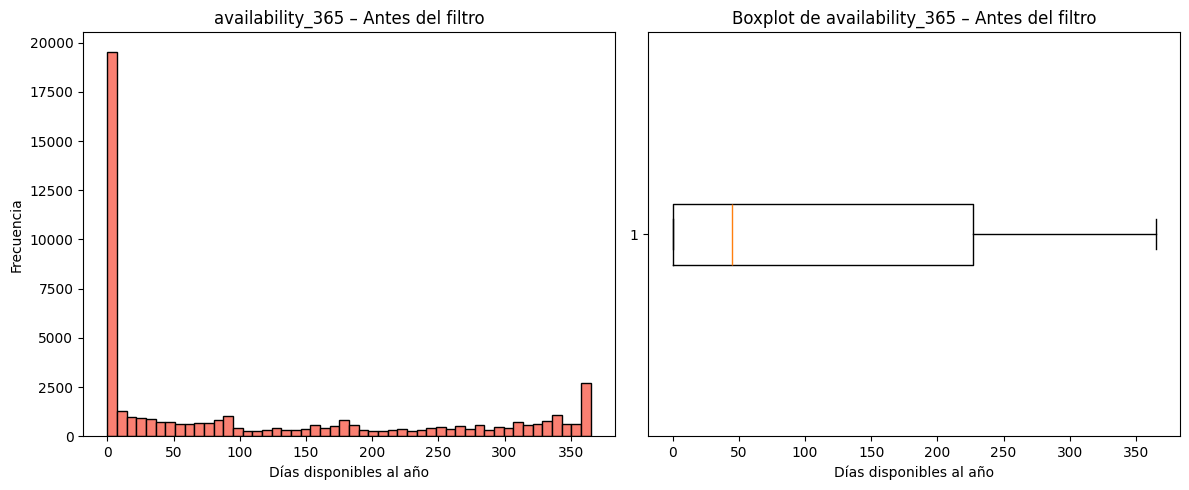

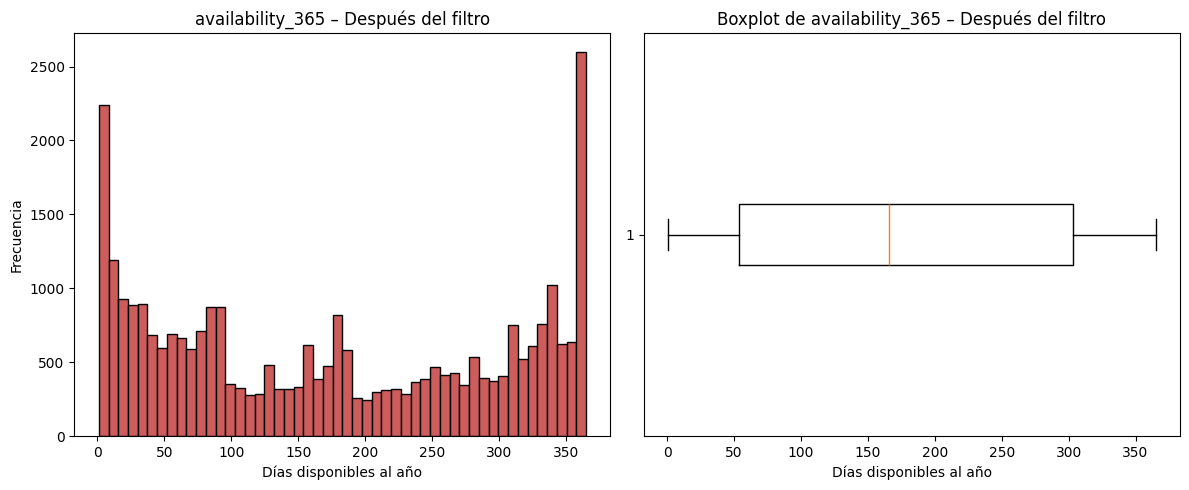

Casos originales: 48884
Casos después del filtro: 30752
Casos eliminados: 18132


In [ ]:
#17. Visualización availability_365
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].hist(df_original_outliers['availability_365'], bins=50, color='salmon', edgecolor='black')
ax[0].set_title('availability_365 – Antes del filtro')
ax[0].set_xlabel('Días disponibles al año')
ax[0].set_ylabel('Frecuencia')

ax[1].boxplot(df_original_outliers['availability_365'], vert=False)
ax[1].set_title('Boxplot de availability_365 – Antes del filtro')
ax[1].set_xlabel('Días disponibles al año')

plt.tight_layout()
plt.show()

# Aplicar filtro
df = df[df['availability_365'] > 0]

# Visualización después del filtro
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].hist(df['availability_365'], bins=50, color='indianred', edgecolor='black')
ax[0].set_title('availability_365 – Después del filtro')
ax[0].set_xlabel('Días disponibles al año')
ax[0].set_ylabel('Frecuencia')

ax[1].boxplot(df['availability_365'], vert=False)
ax[1].set_title('Boxplot de availability_365 – Después del filtro')
ax[1].set_xlabel('Días disponibles al año')

plt.tight_layout()
plt.show()

# Comparación de registros
print("Casos originales:", len(df_original_outliers))
print("Casos después del filtro:", len(df))
print("Casos eliminados:", len(df_original_outliers) - len(df))

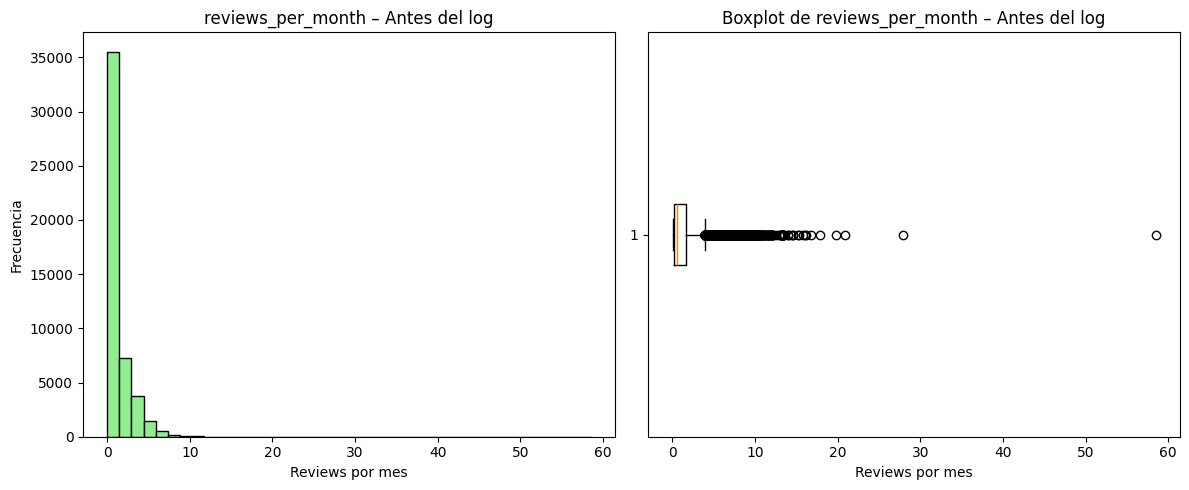

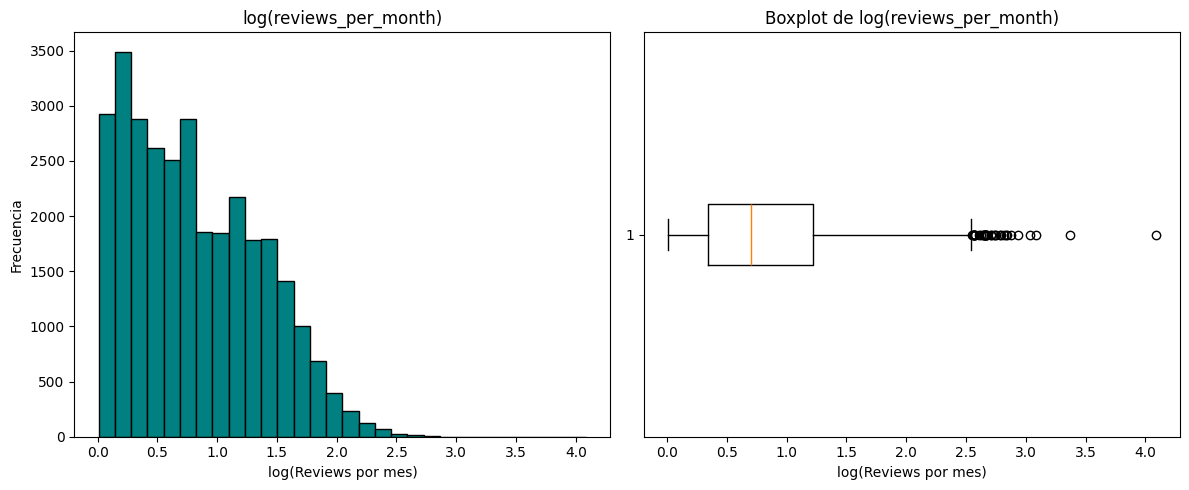

In [ ]:
#18. Visualización reviews_per_month
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].hist(df_original_outliers['reviews_per_month'], bins=40, color='lightgreen', edgecolor='black')
ax[0].set_title('reviews_per_month – Antes del log')
ax[0].set_xlabel('Reviews por mes')
ax[0].set_ylabel('Frecuencia')

ax[1].boxplot(df_original_outliers['reviews_per_month'], vert=False)
ax[1].set_title('Boxplot de reviews_per_month – Antes del log')
ax[1].set_xlabel('Reviews por mes')

plt.tight_layout()
plt.show()

# Aplicar log(1 + x) para evitar problemas con ceros
df['log_reviews_per_month'] = np.log1p(df['reviews_per_month'])

# Visualización después de la transformación
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].hist(df['log_reviews_per_month'], bins=30, color='teal', edgecolor='black')
ax[0].set_title('log(reviews_per_month)')
ax[0].set_xlabel('log(Reviews por mes)')
ax[0].set_ylabel('Frecuencia')

ax[1].boxplot(df['log_reviews_per_month'], vert=False)
ax[1].set_title('Boxplot de log(reviews_per_month)')
ax[1].set_xlabel('log(Reviews por mes)')

plt.tight_layout()
plt.show()

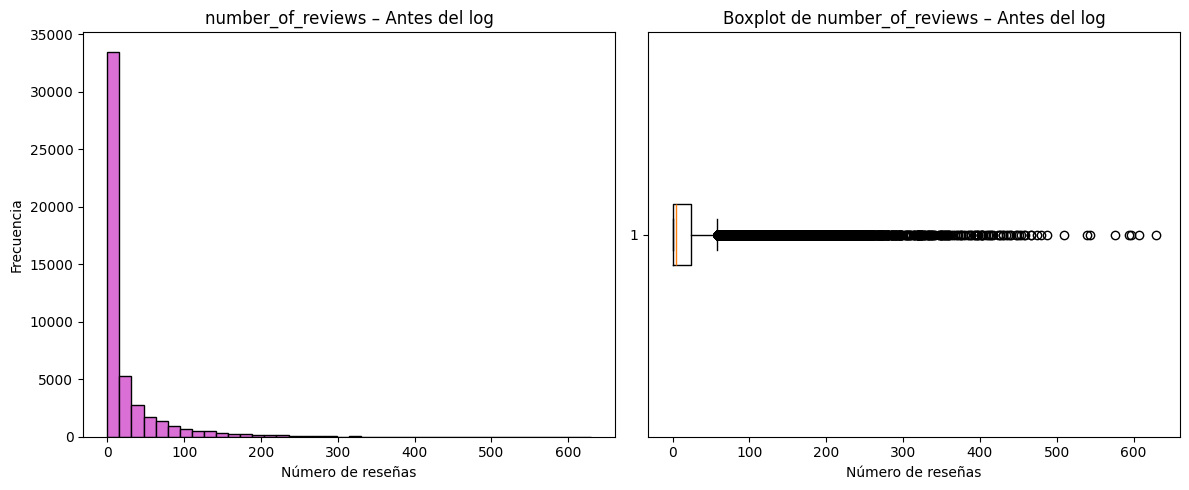

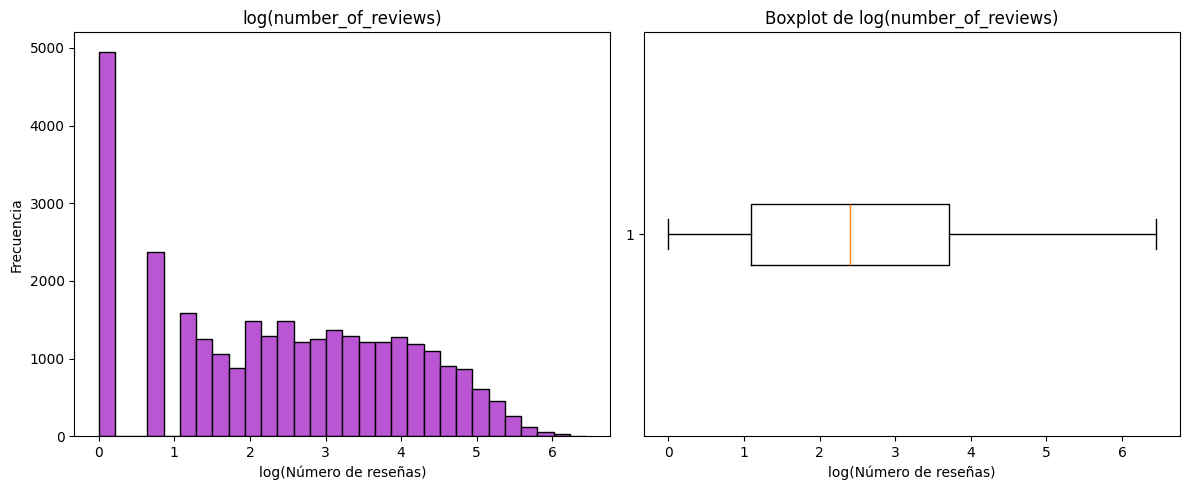

In [ ]:
#19. Visualización number_of_reviews
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].hist(df_original_outliers['number_of_reviews'], bins=40, color='orchid', edgecolor='black')
ax[0].set_title('number_of_reviews – Antes del log')
ax[0].set_xlabel('Número de reseñas')
ax[0].set_ylabel('Frecuencia')

ax[1].boxplot(df_original_outliers['number_of_reviews'], vert=False)
ax[1].set_title('Boxplot de number_of_reviews – Antes del log')
ax[1].set_xlabel('Número de reseñas')

plt.tight_layout()
plt.show()

# Aplicar log(1 + x)
df['log_number_of_reviews'] = np.log1p(df['number_of_reviews'])

# Visualización tras transformación
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].hist(df['log_number_of_reviews'], bins=30, color='mediumorchid', edgecolor='black')
ax[0].set_title('log(number_of_reviews)')
ax[0].set_xlabel('log(Número de reseñas)')
ax[0].set_ylabel('Frecuencia')

ax[1].boxplot(df['log_number_of_reviews'], vert=False)
ax[1].set_title('Boxplot de log(number_of_reviews)')
ax[1].set_xlabel('log(Número de reseñas)')

plt.tight_layout()
plt.show()

# Análisis de correlación

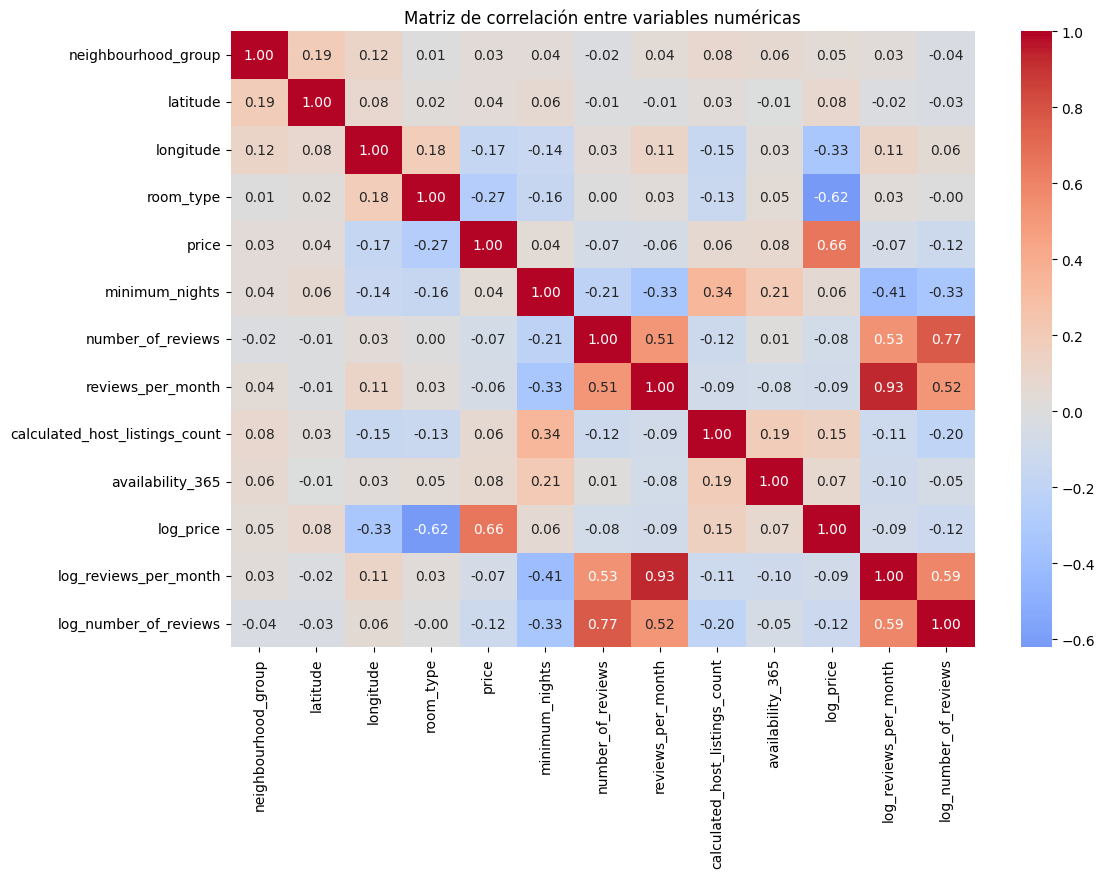

In [ ]:
#20. Matriz de correlación sobre datos numéricos

# Seleccionar solo columnas numéricas para la correlación
df_corr = df.select_dtypes(include=['float64', 'int64'])

# Calcular matriz de correlación
correlation_matrix = df_corr.corr()

# Visualizar con heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title("Matriz de correlación entre variables numéricas")
plt.show()



# Partición y observaciones influyentes

In [ ]:
#21. Partición del dataset en conjunto de entrenamiento y prueba

# X contendrá todas las variables predictoras (excepto las variables objetivo)
X = df.drop(['price', 'log_price'], axis=1)

# y será la variable objetivo: el precio en escala logarítmica
y = df['log_price']

# División del dataset en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tamaños de los conjuntos resultantes
print("Tamaño de X_train:", X_train.shape)
print("Tamaño de X_test:", X_test.shape)
print("Tamaño de y_train:", y_train.shape)
print("Tamaño de y_test:", y_test.shape)

Tamaño de X_train: (24601, 11)
Tamaño de X_test: (6151, 11)
Tamaño de y_train: (24601,)
Tamaño de y_test: (6151,)


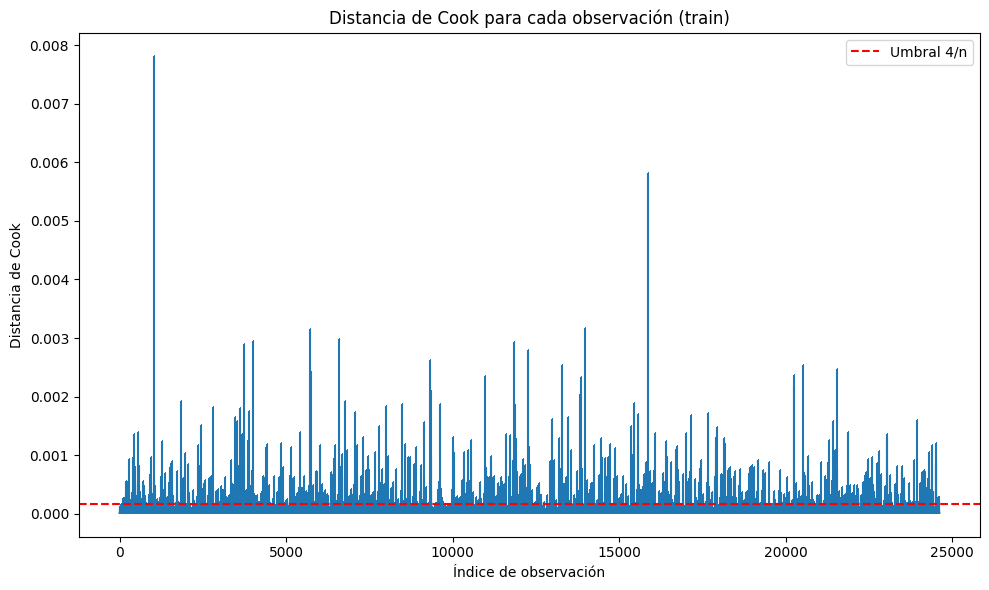

Número de observaciones influyentes: 1208
Porcentaje del total: 4.91%


In [ ]:
#22. Regresión OLS y análisis de observaciones influyentes

# Añadir constante al conjunto de entrenamiento
X_train_const = sm.add_constant(X_train)

# Ajustar el modelo de regresión lineal (OLS)
modelo = sm.OLS(y_train, X_train_const).fit()

# Obtener distancias de Cook
influence = modelo.get_influence()
cooks_d, _ = influence.cooks_distance

# Visualizar las distancias de Cook
plt.figure(figsize=(10, 6))
plt.stem(np.arange(len(cooks_d)), cooks_d, markerfmt=",", basefmt=" ")
plt.title("Distancia de Cook para cada observación (train)")
plt.xlabel("Índice de observación")
plt.ylabel("Distancia de Cook")
plt.axhline(4 / len(X_train), color='red', linestyle='--', label='Umbral 4/n')
plt.legend()
plt.tight_layout()
plt.show()

# Número y porcentaje de observaciones influyentes
umbral = 4 / len(X_train)
influyentes = np.where(cooks_d > umbral)[0]
print(f"Número de observaciones influyentes: {len(influyentes)}")
print(f"Porcentaje del total: {100 * len(influyentes) / len(X_train):.2f}%")

In [ ]:
# 23. Filtrado de observaciones influyentes
umbral = 4 / len(X_train)
idx_influyentes = np.where(cooks_d > umbral)[0]

X_train1 = X_train.drop(index=X_train.index[idx_influyentes])
y_train1 = y_train.drop(index=y_train.index[idx_influyentes])

print(f"Observaciones de entrenamiento eliminadas: {len(idx_influyentes)}")

Observaciones de entrenamiento eliminadas: 1208


In [ ]:
# 24. Filtrar test usando rango IQR del train limpio
q1, q3 = y_train1.quantile(0.25), y_train1.quantile(0.75)
iqr = q3 - q1
lim_inf, lim_sup = q1 - 1.5*iqr, q3 + 1.5*iqr

mask_test = (y_test >= lim_inf) & (y_test <= lim_sup)
X_test1 = X_test.loc[mask_test]
y_test1 = y_test.loc[mask_test]

print(f"Test original: {len(X_test)}, filtrado: {len(X_test1)}")

Test original: 6151, filtrado: 6069


# Ingeniería de características

In [ ]:
# 25. Variables nuevas para enriquecer el modelo

# Disponible todo el año
df['available_all_year'] = (df['availability_365'] == 365).astype(int)

# Superhosts
df['is_superhost'] = (df['calculated_host_listings_count'] > 10).astype(int)

# Grupos de minimum_nights
df['min_nights_group'] = pd.cut(df['minimum_nights'],
                                bins=[0,2,7,30,np.inf],
                                labels=['1-2','3-7','8-30','30+'])

# Días desde última reseña
if 'last_review' in df.columns:
    df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')
    df['days_since_review'] = (pd.Timestamp('today') - df['last_review']).dt.days

# Codificación de la nueva variable
from sklearn.preprocessing import LabelEncoder
df['min_nights_group_encoded'] = LabelEncoder().fit_transform(df['min_nights_group'].astype(str))

print("Nuevas variables añadidas:",
      [col for col in ['available_all_year','is_superhost','min_nights_group_encoded','days_since_review']
       if col in df.columns])

Nuevas variables añadidas: ['available_all_year', 'is_superhost', 'min_nights_group_encoded']


# Selección de variables

In [ ]:
# 26.Selección rápida de variables por correlación
# Asegúrate de usar X_train1/y_train1 como entrenamiento limpio
df_train_comb = X_train1.join(y_train1.rename('log_price'))
corr_abs = df_train_comb.corr()['log_price'].abs().sort_values(ascending=False)
print("Correlación absoluta con log_price:\n", corr_abs)

# Seleccionamos variables con correlación ≥ 0.1
vars_corr = corr_abs[corr_abs >= 0.1].index.drop('log_price').tolist()
print("Seleccionadas:", vars_corr)

# Validación rápida vía regresión lineal
from sklearn.linear_model import LinearRegression
model_lr = LinearRegression()
scores = cross_val_score(model_lr, X_train1[vars_corr], y_train1, cv=5, scoring='r2')
print(f"R² medio en CV: {scores.mean():.3f}")

Correlación absoluta con log_price:
 log_price                         1.000000
room_type                         0.689112
longitude                         0.408001
calculated_host_listings_count    0.163251
log_number_of_reviews             0.094507
latitude                          0.082029
reviews_per_month                 0.072329
log_reviews_per_month             0.070510
number_of_reviews                 0.057577
neighbourhood_group               0.054329
minimum_nights                    0.050046
availability_365                  0.047142
Name: log_price, dtype: float64
Seleccionadas: ['room_type', 'longitude', 'calculated_host_listings_count']


NameError: name 'cross_val_score' is not defined

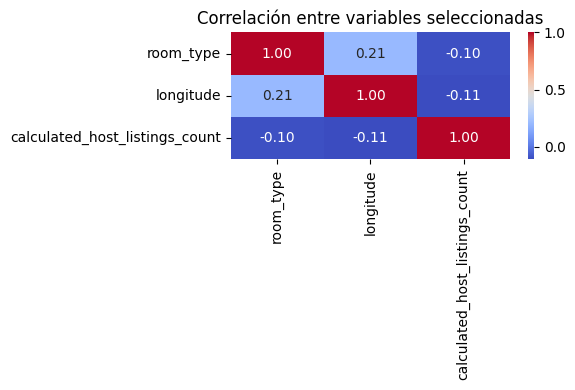

In [ ]:
# 27. Matriz de correlación de las variables seleccionadas
plt.figure(figsize=(6, 4))
sns.heatmap(X_train_clean[variables_corr].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlación entre variables seleccionadas")
plt.tight_layout()
plt.show()

In [ ]:
#28. Verificar multicolinealidad (VIF)
def calcular_vif(df):
    return pd.Series([variance_inflation_factor(df.values, i)
                      for i in range(df.shape[1])], index=df.columns)

vif = calcular_vif(X_train1[vars_corr])
print("VIF por variable:\n", vif)

VIF por variable:
 room_type                         1.867679
longitude                         1.979383
calculated_host_listings_count    1.084228
dtype: float64


# Revisión final de correlaciones

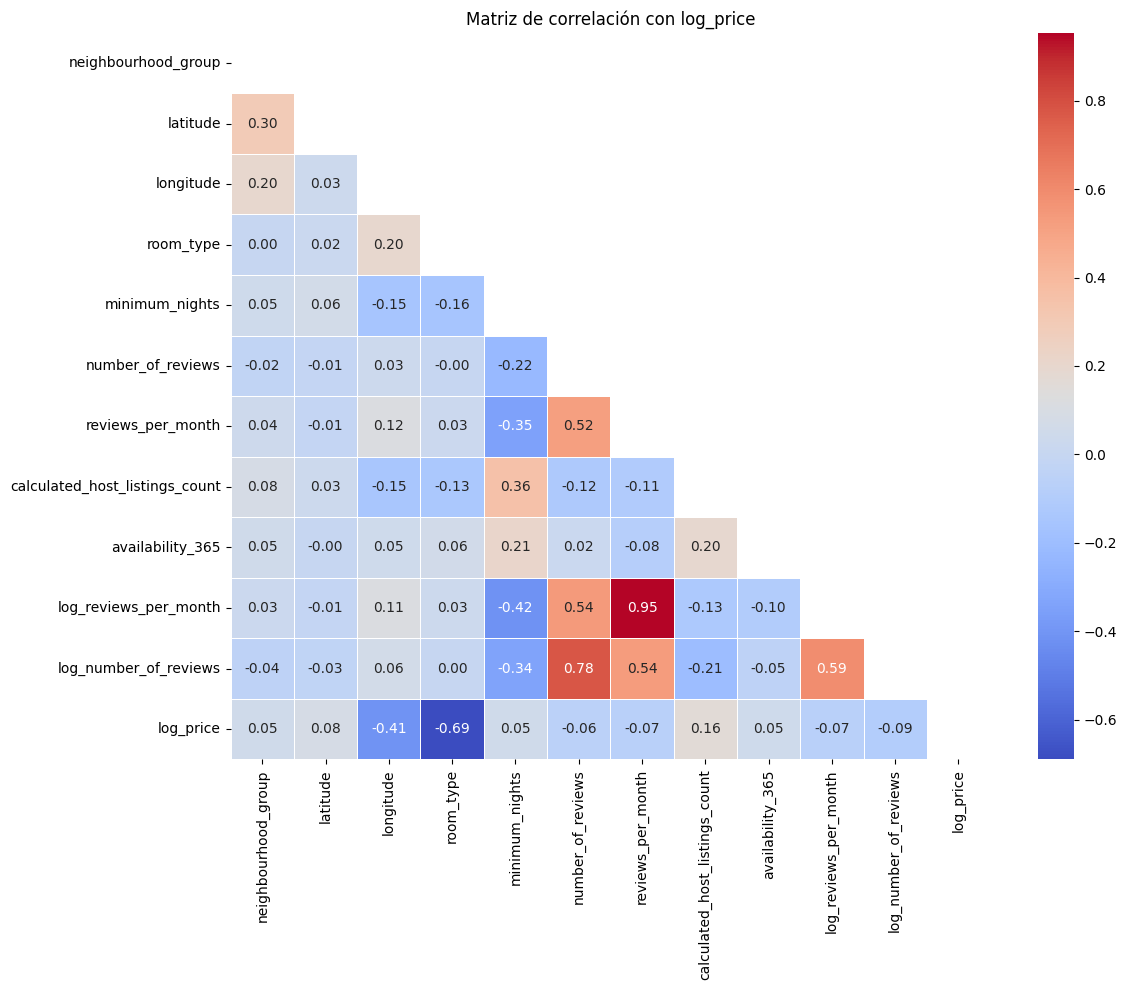

In [ ]:
# 29. Correlación tras limpieza completa
X_corr = X_train1.copy().join(y_train1.rename('log_price'))
mask = np.triu(np.ones_like(X_corr.corr(), dtype=bool))
plt.figure(figsize=(12,10))
sns.heatmap(X_corr.corr(), mask=mask, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Matriz de correlación con log_price")
plt.tight_layout()
plt.show()

# Escalado final

In [ ]:
#30. Escalado del conjunto final para modelado

scaler = StandardScaler()

# Filtramos con las variables seleccionadas
X_train_final = X_train1[vars_corr].copy()
X_test_final = X_test1[vars_corr].copy()

X_train_scaled = scaler.fit_transform(X_train_final)
X_test_scaled = scaler.transform(X_test_final)

print("Dimensiones escalado:", X_train_scaled.shape, X_test_scaled.shape)

Dimensiones escalado: (23393, 3) (6069, 3)
